¡Hola, Aldo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Aldo! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el ajuste!

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_usuarios = pd.read_csv("megaline_users.csv")
df_llamadas = pd.read_csv("megaline_calls.csv")
df_mensajes = pd.read_csv("megaline_messages.csv")
df_internet = pd.read_csv("megaline_internet.csv")
df_tarifas = pd.read_csv("megaline_plans.csv")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_tarifas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_tarifas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]  

*R.- El DataFrame se compone únicamente de 2 registros. No hay valores nulos. Las columnas usd_monthly_pay y usd_per_gb, al representar cantidades monetarias, es recomendable que almacenen valores de tipo float (igual que las columnas usd_per_message y usd_per_minute).*

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
df_tarifas[["usd_per_gb", "usd_monthly_pay"]] = df_tarifas[["usd_per_gb", "usd_monthly_pay"]].astype(float)

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
# Cambia el nombre de la columna "mb_per_month_included" a "gb_per_month_included" y convierte los mb a gb.
df_tarifas.rename(columns={"mb_per_month_included": "gb_per_month_included"}, inplace=True)
df_tarifas["gb_per_month_included"] = df_tarifas["gb_per_month_included"] / 1024
df_tarifas

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20.0,10.0,0.03,0.03,surf
1,1000,30.0,3000,70.0,7.0,0.01,0.01,ultimate



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
<b>Transformé los mb a gb en la columna "gb_per_month_included.".</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el ajuste!

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
df_usuarios.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
113,1113,Spencer,Powers,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,ultimate,NaN
256,1256,Johnny,Wise,53,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-11,surf,NaN
45,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,NaN
238,1238,Jackeline,Byrd,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-16,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*R.- La columna user_id es de tipo object. Se recomienda su conversión a tipo float para optimización de espacio. Las columnas reg_date y churn_date, debido a que almacenan fechas, de igual manera se recomienda su conversión de datos a tipo datetime. Esta última columna (churn_date) muestra valores nulos, lo cual podría indicar que el usuario no se ha dado de baja o que hay datos faltantes.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
df_usuarios["reg_date"] = pd.to_datetime(df_usuarios["reg_date"], format="%Y-%m-%d")
df_usuarios["churn_date"] = pd.to_datetime(df_usuarios["churn_date"], format="%Y-%m-%d")

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el ajuste!

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Encuentro todo bien.

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
df_llamadas.sample(5)

,id,user_id,call_date,duration
100847,1360_53,1360,2018-12-30,9.81
30397,1114_166,1114,2018-11-05,2.25
130762,1470_211,1470,2018-09-22,11.66
16036,1062_276,1062,2018-09-18,7.40
79740,1285_221,1285,2018-09-10,19.72


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*R.- Las columnas que hacen referencia a ID's se recomienda de preferencia que almacenen valores tipo int. En este caso, la columna "user_id" sí cumple este punto, caso contrario, la columna "id" no cumple, ya que es tipo object. Recomiendo por cuestiones de simplicidad visual, cambiar el nombre de la columna "id" a "call_id". La columna "call_date" debe cambiar a tipo datetime. Se observa en la columna "duration" un formato fraccionario para representar el tiempo, el cual no respeta los rangos del 0 al 59 (ej: 7.82), por lo cual propongo desarrollar una función que permita formatear el tiempo de manera entendible. la tabla no muestra valores ausentes.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Cambia el nombre de la columna "id" a "call_id" para mejor comprensión.
df_llamadas = df_llamadas.rename(columns={"id": "call_id"})
# Convierte la columna "call_id" a tipo int.
df_llamadas["call_id"] = df_llamadas["call_id"].astype("int64")
# Convierte la columna "call_date" a tipo datetime.
df_llamadas["call_date"] = pd.to_datetime(df_llamadas["call_date"])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Formatea los tiempos para la columna "duration".
def formatea_tiempo(tiempo):
    entero = int(tiempo) # Parte entera, representa los minutos.
    decimal = int(str(tiempo).split(".")[1]) # Parte decimal, representa los segundos.
    minutos_extra = decimal // 60 # Cada 60 segundos, se forma un minuto extra.
    minutos = entero + minutos_extra # Suma los minutos extra a los minutos originales.
    segundos = decimal % 60 # Los segundos que sobran tras formar minutos.
    return float(f"{minutos}.{segundos:02}") # Devuelve el resultado en formato decimal tipo MM.SS

df_llamadas["duration"] = df_llamadas["duration"].apply(formatea_tiempo) # Aplica la función a la columna "duration".

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
<b>Probablemente llamadas que se realizaron pero no se contestaron.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el ajuste!

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
df_mensajes.sample(5)

,id,user_id,message_date
1462,1014_181,1014,2018-12-10
55075,1347_112,1347,2018-08-15
5145,1046_207,1046,2018-10-18
61751,1385_215,1385,2018-11-19
62940,1399_5,1399,2018-12-03


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*R.- No hay datos ausentes. Propongo cambiar el nombre de la columna "id" a "message_id" y cambiar su tipo de dato a int. También la columna "message_date" cambiar su tipo de dato a datetime.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
# Cambia el nombre de la columna "id" a "message_id" para mejor comprensión.
df_mensajes = df_mensajes.rename(columns={"id": "message_id"})
# Convierte la columna "message_id" a tipo int64.
df_mensajes["message_id"] = df_mensajes["message_id"].astype("int64")
# Convierte la columna "message_date" a tipo datetime.
df_mensajes["message_date"] = pd.to_datetime(df_mensajes["message_date"])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
# Encuentro todo bien.

## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(5)

,id,user_id,session_date,mb_used
50296,1224_88,1224,2018-07-30,481.17
75816,1357_101,1357,2018-08-11,0.00
42349,1187_526,1187,2018-05-26,0.00
54647,1247_62,1247,2018-09-07,380.21
65729,1304_88,1304,2018-12-12,178.58


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*R.- Mismo caso que los anteriores. Dar un nombre más entendible a la columna "id" por "session_id" y cambiar a los datos correspondientes tanto para esta columna (cambiar a tipo int) como para "session_date" (cambiar a tipo datetime). No se muestran valores nulos.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
# Cambia el nombre de la columna "id" a "session_id" para mejor comprensión.
df_internet = df_internet.rename(columns={"id": "session_id"})
# Convierte la columna "session_id" a tipo int64.
df_internet["session_id"] = df_internet["session_id"].astype("int64")
# Convierte la columna "session_date" a tipo datetime.
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"])
# Cambia el nombre de la columna "mb_used" a "gb_used" y convierte los mb a gb.
df_internet = df_internet.rename(columns={"mb_used": "gb_used"})
df_internet["gb_used"] = np.ceil(df_internet["gb_used"] / 1024)
df_internet

,session_id,user_id,session_date,gb_used
0,100013,1000,2018-12-29,1.0
1,1000204,1000,2018-12-31,0.0
2,1000379,1000,2018-12-28,1.0
3,1000413,1000,2018-12-26,1.0
4,1000442,1000,2018-12-27,1.0
...,...,...,...,...
104820,1499215,1499,2018-10-20,1.0
104821,1499216,1499,2018-12-30,1.0
104822,1499217,1499,2018-09-22,1.0
104823,1499218,1499,2018-12-07,0.0


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
<b>Ya transformé los mb a gb. Quedaron redondeados los valores en la columna "gb_used".</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el ajuste!

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
# Encuentro todo bien.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_tarifas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(5), int64(2), object(1)
memory usage: 256.0+ bytes


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_llamadas_usuario = (
    df_llamadas.groupby([df_llamadas["user_id"], df_llamadas["call_date"].dt.month_name()])
    .size()
    .reset_index(name="total_llamadas")
)
df_llamadas_usuario

,user_id,call_date,total_llamadas
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65
...,...,...,...
2253,1498,September,45
2254,1499,December,65
2255,1499,November,45
2256,1499,October,53



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_minutos_usuario_mes = (
    df_llamadas.groupby([df_llamadas["user_id"], df_llamadas["call_date"].dt.month_name()])["duration"]
    .sum()
    .reset_index(name="total_minutos")
)
df_minutos_usuario_mes

,user_id,call_date,total_minutos
0,1000,December,118.46
1,1001,August,173.88
2,1001,December,397.57
3,1001,November,409.27
4,1001,October,380.35
...,...,...,...
2253,1498,September,346.04
2254,1499,December,474.30
2255,1499,November,292.18
2256,1499,October,366.37


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_mensajes_usuarios_mes = (
    df_mensajes.groupby(["user_id", df_mensajes["message_date"].dt.month_name()])
    .size()
    .reset_index(name="total_mensajes")
)
df_mensajes_usuarios_mes

,user_id,message_date,total_mensajes
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
...,...,...,...
1801,1496,December,11
1802,1496,November,13
1803,1496,October,18
1804,1496,September,21


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_trafico_usuario_mes = (
    df_internet.groupby(["user_id", df_internet["session_date"].dt.month_name()])["gb_used"]
    .sum()
    .reset_index(name="total_gb")
)
df_trafico_usuario_mes

,user_id,session_date,total_gb
0,1000,December,4.0
1,1001,August,21.0
2,1001,December,55.0
3,1001,November,49.0
4,1001,October,50.0
...,...,...,...
2272,1498,September,52.0
2273,1499,December,58.0
2274,1499,November,43.0
2275,1499,October,52.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merge1 = pd.merge(df_llamadas_usuario, df_minutos_usuario_mes, on=["user_id", "call_date"])
merge2 = pd.merge(
    merge1, df_mensajes_usuarios_mes, left_on=["user_id", "call_date"], right_on=["user_id", "message_date"]
)
merge2.drop(columns=["message_date"], inplace=True)
df_actividad_mensual_usuarios = pd.merge(
    merge2, df_trafico_usuario_mes, left_on=["user_id", "call_date"], right_on=["user_id", "session_date"]
)
df_actividad_mensual_usuarios.drop(columns="session_date", inplace=True)
df_actividad_mensual_usuarios.rename(columns={"call_date": "mes"}, inplace=True)
df_actividad_mensual_usuarios

,user_id,mes,total_llamadas,total_minutos,total_mensajes,total_gb
0,1000,December,16,118.46,11,4.0
1,1001,August,27,173.88,30,21.0
2,1001,December,56,397.57,44,55.0
3,1001,November,64,409.27,36,49.0
4,1001,October,65,380.35,53,50.0
...,...,...,...,...,...,...
1754,1496,December,40,281.30,11,41.0
1755,1496,November,39,293.50,13,27.0
1756,1496,October,46,304.60,18,41.0
1757,1496,September,52,393.51,21,42.0


In [29]:
# Añade la información de la tarifa
df_actividad_mensual_usuarios = pd.merge(
    df_actividad_mensual_usuarios,
    df_usuarios[['user_id', 'plan']],
    on='user_id',
    how='left'
)
df_actividad_mensual_usuarios

,user_id,mes,total_llamadas,total_minutos,total_mensajes,total_gb,plan
0,1000,December,16,118.46,11,4.0,ultimate
1,1001,August,27,173.88,30,21.0,surf
2,1001,December,56,397.57,44,55.0,surf
3,1001,November,64,409.27,36,49.0,surf
4,1001,October,65,380.35,53,50.0,surf
...,...,...,...,...,...,...,...
1754,1496,December,40,281.30,11,41.0,surf
1755,1496,November,39,293.50,13,27.0,surf
1756,1496,October,46,304.60,18,41.0,surf
1757,1496,September,52,393.51,21,42.0,surf


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario

# Une actividad de usuarios con sus planes tarifarios.
df_costos_mensuales = df_actividad_mensual_usuarios.merge(
    df_tarifas,
    left_on='plan',
    right_on='plan_name',
    how='left'
)

# Calcula excesos (solo se cobra si se pasa el límite).
df_costos_mensuales['exceso_minutos'] = (
    df_costos_mensuales['total_minutos'] - df_costos_mensuales['minutes_included']
).clip(lower=0)

df_costos_mensuales['exceso_mensajes'] = (
    df_costos_mensuales['total_mensajes'] - df_costos_mensuales['messages_included']
).clip(lower=0)

df_costos_mensuales['exceso_mb'] = (
    df_costos_mensuales['total_gb'] - df_costos_mensuales['gb_per_month_included']
).clip(lower=0)

# Convierte exceso de MB a GB para aplicar el precio por GB.
df_costos_mensuales['exceso_gb'] = np.ceil(df_costos_mensuales['exceso_mb'] / 1024)

# Calcula el costo total.
df_costos_mensuales['costo_total'] = (
    df_costos_mensuales['usd_monthly_pay'] +
    df_costos_mensuales['exceso_minutos'] * df_costos_mensuales['usd_per_minute'] +
    df_costos_mensuales['exceso_mensajes'] * df_costos_mensuales['usd_per_message'] +
    df_costos_mensuales['exceso_gb'] * df_costos_mensuales['usd_per_gb']
)
df_costos_mensuales.drop(columns="plan_name", inplace=True)
df_costos_mensuales

,user_id,mes,total_llamadas,total_minutos,total_mensajes,total_gb,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,exceso_minutos,exceso_mensajes,exceso_mb,exceso_gb,costo_total
0,1000,December,16,118.46,11,4.0,ultimate,1000,30.0,3000,70.0,7.0,0.01,0.01,0.0,0,0.0,0.0,70.00
1,1001,August,27,173.88,30,21.0,surf,50,15.0,500,20.0,10.0,0.03,0.03,0.0,0,6.0,1.0,30.00
2,1001,December,56,397.57,44,55.0,surf,50,15.0,500,20.0,10.0,0.03,0.03,0.0,0,40.0,1.0,30.00
3,1001,November,64,409.27,36,49.0,surf,50,15.0,500,20.0,10.0,0.03,0.03,0.0,0,34.0,1.0,30.00
4,1001,October,65,380.35,53,50.0,surf,50,15.0,500,20.0,10.0,0.03,0.03,0.0,3,35.0,1.0,30.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,December,40,281.30,11,41.0,surf,50,15.0,500,20.0,10.0,0.03,0.03,0.0,0,26.0,1.0,30.00
1755,1496,November,39,293.50,13,27.0,surf,50,15.0,500,20.0,10.0,0.03,0.03,0.0,0,12.0,1.0,30.00
1756,1496,October,46,304.60,18,41.0,surf,50,15.0,500,20.0,10.0,0.03,0.03,0.0,0,26.0,1.0,30.00
1757,1496,September,52,393.51,21,42.0,surf,50,15.0,500,20.0,10.0,0.03,0.03,0.0,0,27.0,1.0,30.00


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el ajuste!

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


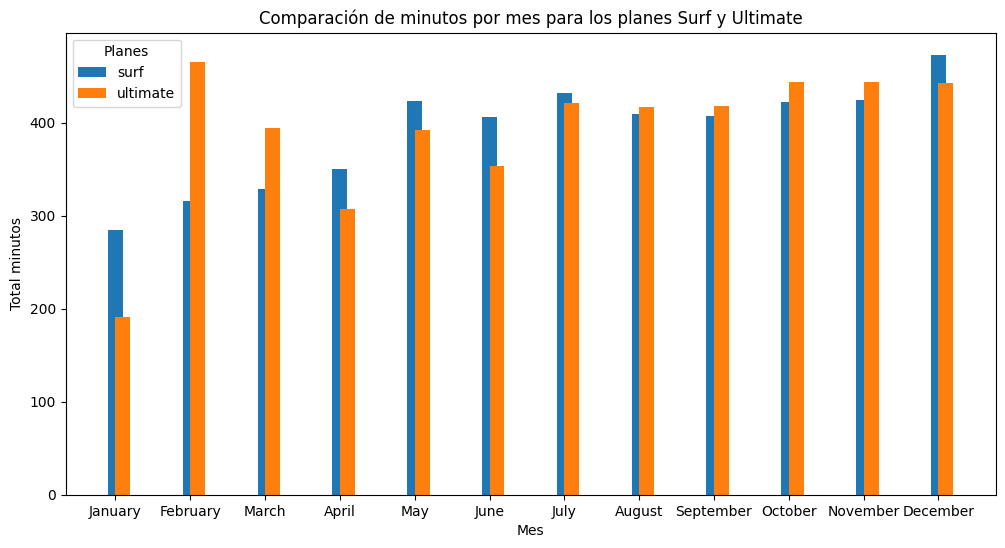

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupa por "plan" y "mes" y calcula el promedio de "total_minutos".
promedio_llamadas_plan_mes = df_costos_mensuales.groupby(["plan", "mes"])[["total_minutos"]].mean().reset_index()
# Promedio de minutos para plan "surf".
llamadas_plan_surf = promedio_llamadas_plan_mes.loc[promedio_llamadas_plan_mes["plan"] == "surf"]
# Promedio de minutos para plan "ultimate".
llamadas_plan_ultimate = promedio_llamadas_plan_mes.loc[promedio_llamadas_plan_mes["plan"] == "ultimate"]

meses_ordenados = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# Ordena el DataFrame por orden de los meses.
llamadas_plan_surf.loc[:, "mes"] = pd.Categorical(llamadas_plan_surf["mes"], categories=meses_ordenados, ordered=True)
llamadas_plan_surf = llamadas_plan_surf.sort_values("mes")

# Ordena el DataFrame por orden de los meses.
llamadas_plan_ultimate.loc[:, "mes"] = pd.Categorical(llamadas_plan_ultimate["mes"], categories=meses_ordenados, ordered=True)
llamadas_plan_ultimate = llamadas_plan_ultimate.sort_values("mes")

# Crea el gráfico de barras.
plt.figure(figsize=(12, 6))

# Grafica el plan "surf".
plt.bar(llamadas_plan_surf["mes"], llamadas_plan_surf["total_minutos"], width=0.2, label="surf", align="center")

# Grafica el plan "ultimate".
plt.bar(
    llamadas_plan_ultimate["mes"], llamadas_plan_ultimate["total_minutos"], width=0.2, label="ultimate", align="edge"
)
# Personalización del gráfico.
plt.xlabel("Mes")
plt.ylabel("Total minutos")
plt.title("Comparación de minutos por mes para los planes Surf y Ultimate")
plt.legend(title="Planes")

# Mouestra el gráfico.
plt.show()

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Plan surf:
media_plan_surf = llamadas_plan_surf["total_minutos"].mean()
varianza_plan_surf = llamadas_plan_surf["total_minutos"].var()
print(f"Media plan surf: {media_plan_surf:.2f} minutos")
print(f"Varianza plan surf: {varianza_plan_surf:.2f} minutos²")

# Plan ultimate:
media_plan_ultimate = llamadas_plan_ultimate["total_minutos"].mean()
varianza_plan_ultimate = llamadas_plan_ultimate["total_minutos"].var()
print(f"Media plan ultimate: {media_plan_ultimate:.2f} minutos")
print(f"Varianza plan ultimate: {varianza_plan_ultimate:.2f} minutos²")


Media plan surf: 389.69 minutos
Varianza plan surf: 3155.37 minutos²
Media plan ultimate: 390.64 minutos
Varianza plan ultimate: 5861.25 minutos²


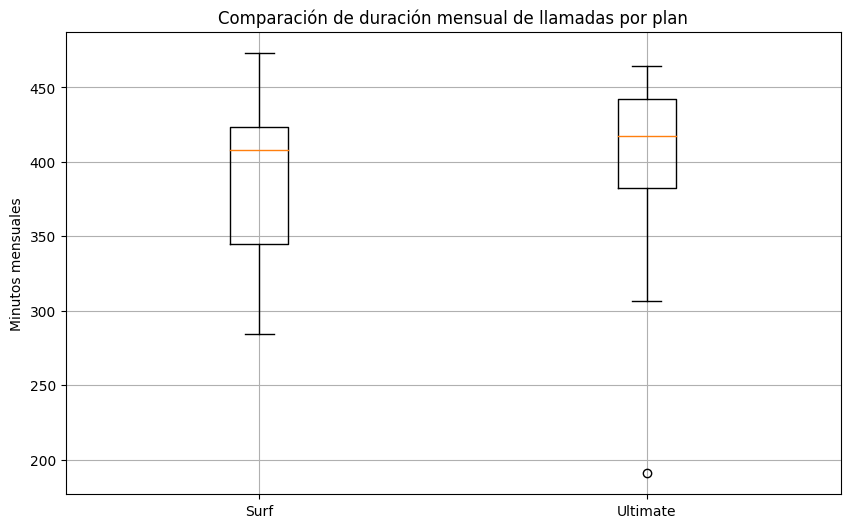

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
plt.boxplot([llamadas_plan_surf["total_minutos"], llamadas_plan_ultimate["total_minutos"]], labels=["Surf", "Ultimate"])
plt.ylabel("Minutos mensuales")
plt.title("Comparación de duración mensual de llamadas por plan")
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

*R.- El plan ultimate tiene una mediana más alta que el plan surf, lo que indica que los usuarios de ultimate tienden a hablar más en promedio cada mes. La caja de ultimate (que representa el rango de los cuartiles, Q1 a Q3) está más arriba, lo que refuerza la idea de un mayor uso promedio. El plan surf muestra una dispersión más amplia (la caja y los bigotes son más largos), lo que indica que hay más variación mensual entre los usuarios de ese plan. En cambio, ultimate tiene una distribución más concentrada, especialmente en el rango de los cuartiles, lo que sugiere un uso más consistente entre sus usuarios.*

### Mensajes

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

mensajes_surf = (
    df_costos_mensuales[df_costos_mensuales["plan"] == "surf"]
    .groupby(["user_id", "mes"], as_index=False)["total_mensajes"]
    .sum()
)
mensajes_ultimate = (
    df_costos_mensuales[df_costos_mensuales["plan"] == "ultimate"]
    .groupby(["user_id", "mes"], as_index=False)["total_mensajes"]
    .sum()
)


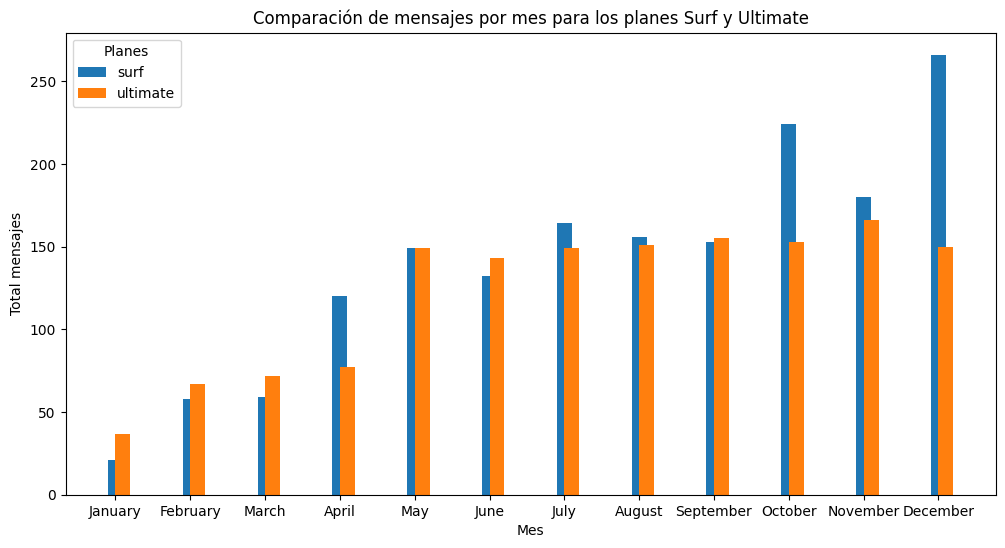

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mensajes_surf = (
    df_costos_mensuales[df_costos_mensuales["plan"] == "surf"]
    .groupby(["user_id", "mes"], as_index=False)["total_mensajes"]
    .sum()
)
mensajes_ultimate = (
    df_costos_mensuales[df_costos_mensuales["plan"] == "ultimate"]
    .groupby(["user_id", "mes"], as_index=False)["total_mensajes"]
    .sum()
)

# Ordena los DataFrames por mes.
mensajes_surf["mes"] = pd.Categorical(mensajes_surf["mes"], categories=meses_ordenados, ordered=True)
mensajes_surf = mensajes_surf.sort_values("mes")
mensajes_ultimate["mes"] = pd.Categorical(mensajes_ultimate["mes"], categories=meses_ordenados, ordered=True)
mensajes_ultimate = mensajes_ultimate.sort_values("mes")

# Crea el gráfico.
plt.figure(figsize=(12, 6))
plt.bar(mensajes_surf["mes"], mensajes_surf["total_mensajes"], width=0.2, label="surf")
plt.bar(mensajes_ultimate["mes"], mensajes_ultimate["total_mensajes"], width=0.2, label="ultimate", align="edge")
plt.xlabel("Mes")
plt.ylabel("Total mensajes")
plt.title("Comparación de mensajes por mes para los planes Surf y Ultimate")
plt.legend(title="Planes")
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

*A lo largo de casi todo el año, los usuarios del plan surf enviaron más mensajes que los del plan ultimate. La diferencia se vuelve especialmente clara en los últimos meses del año (Octubre a Diciembre), donde el uso de mensajes en el plan Surf crece significativamente. Para ambos planes, el número de mensajes aumenta progresivamente con el tiempo, sin embargo, este crecimiento es más pronunciado en el plan surf.*

### Internet

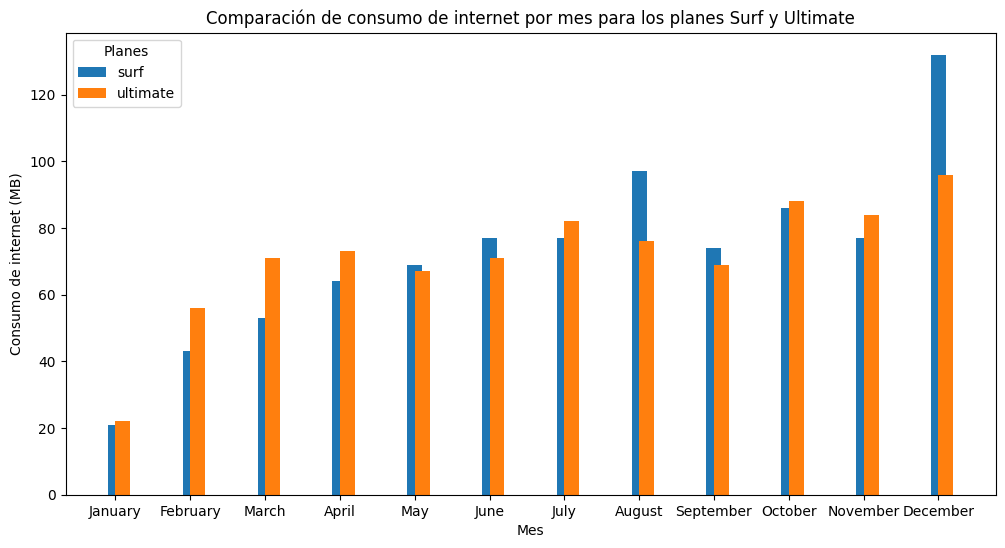

In [37]:
# Internet consumido del plan surf.
internet_surf = (
    df_costos_mensuales[df_costos_mensuales["plan"] == "surf"]
    .groupby(["user_id", "mes"], as_index=False)["total_gb"]
    .sum()
)
# Internet consumido del plan ultimate.
internet_ultimate = (
    df_costos_mensuales[df_costos_mensuales["plan"] == "ultimate"]
    .groupby(["user_id", "mes"], as_index=False)["total_gb"]
    .sum()
)

# Ordena los DataFrames por mes.
internet_surf["mes"] = pd.Categorical(internet_surf["mes"], categories=meses_ordenados, ordered=True)
internet_ultimate["mes"] = pd.Categorical(internet_ultimate["mes"], categories=meses_ordenados, ordered=True)
internet_surf = internet_surf.sort_values("mes")
internet_ultimate = internet_ultimate.sort_values("mes")

# Crea el gráfico.
plt.figure(figsize=(12, 6))
plt.bar(internet_surf["mes"], internet_surf["total_gb"], width=0.2, label="surf")
plt.bar(internet_ultimate["mes"], internet_ultimate["total_gb"], width=0.2, label="ultimate", align="edge")
plt.xlabel("Mes")
plt.ylabel("Consumo de internet (MB)")
plt.title("Comparación de consumo de internet por mes para los planes Surf y Ultimate")
plt.legend(title="Planes")
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

*Ambos planes muestran un aumento progresivo en el consumo de internet conforme avanza el año. El plan ultimate presenta un consumo más alto que surf la mayor parte del año, a excepción de los meses de Agosto y Diciembre, en donde el plan surf muestra un aumento considerable ante el ultimate.*

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

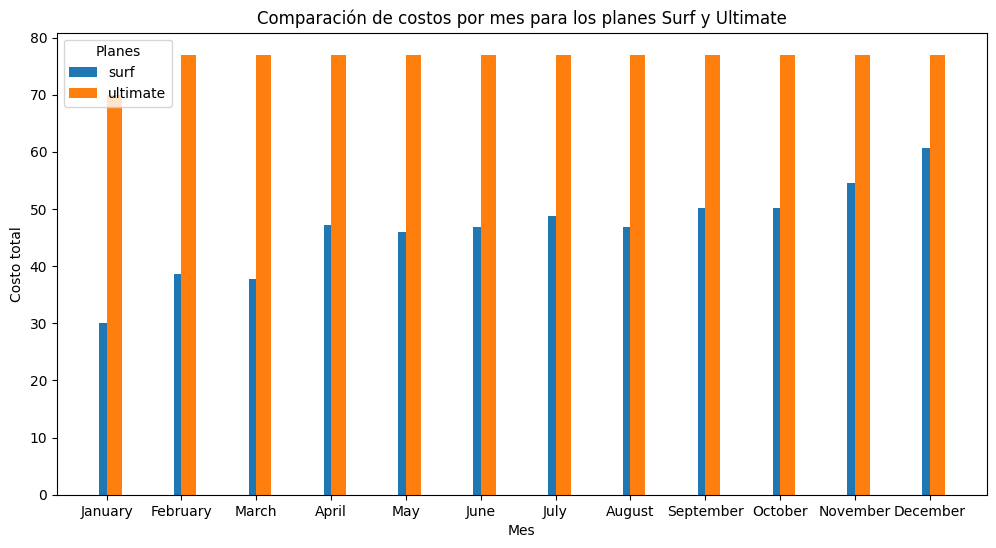

In [38]:
# Ingresos por usuarios por mes del plan surf.
ingresos_surf = (
    df_costos_mensuales[df_costos_mensuales["plan"] == "surf"]
    .groupby(["user_id", "mes"], as_index=False)["costo_total"]
    .sum()
)

# Ingresos por usuarios por mes del plan ultimate.
ingresos_ultimate = (
    df_costos_mensuales[df_costos_mensuales["plan"] == "ultimate"]
    .groupby(["user_id", "mes"], as_index=False)["costo_total"]
    .sum()
)

# Ordena los DataFrames por mes.
ingresos_surf["mes"] = pd.Categorical(ingresos_surf["mes"], categories=meses_ordenados, ordered=True)
ingresos_ultimate["mes"] = pd.Categorical(ingresos_ultimate["mes"], categories=meses_ordenados, ordered=True)
ingresos_surf = ingresos_surf.sort_values("mes")
ingresos_ultimate = ingresos_ultimate.sort_values("mes")

# Crea el gráfico.
plt.figure(figsize=(12, 6))
plt.bar(ingresos_surf["mes"], ingresos_surf["costo_total"], width=0.2, label="surf")
plt.bar(ingresos_ultimate["mes"], ingresos_ultimate["costo_total"], width=0.2, label="ultimate", align="edge")
plt.xlabel("Mes")
plt.ylabel("Costo total")
plt.title("Comparación de costos por mes para los planes Surf y Ultimate")
plt.legend(title="Planes")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

*Los resultados muestran un mayor costo para los usuarios del plan surf. Ambos planes tienen una tendencia creciente de costos conforme avanzan los meses del año, siendo más notable para el plan surf. Esto podría indicar que a pesar de la diferencia de precio entre un plan y otro, a la larga, el plan ultimate puede resultar más económico en cuestión de llamadas, mensajes y mb consumidos por los usuarios.*

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [39]:
# Prueba las hipótesis

# Extrae los ingresos.
surf_ingresos = ingresos_surf["costo_total"]
ultimate_ingresos = ingresos_ultimate["costo_total"]

# Definición de las hipótesis.
print("H0: Los ingresos promedio de los planes Surf y Ultimate son iguales.")
print("H1: Los ingresos promedio de los planes Surf y Ultimate son diferentes.")

# Nivel de significancia.
alpha = 0.05
print(f"Nivel de significancia (α): {alpha}")

# Realiza la prueba t (Welch's t-test, no se asumen varianzas iguales).
t_stat, p_value = ttest_ind(surf_ingresos, ultimate_ingresos, equal_var=False)

# Muestra los resultados.
print(f"\nEstadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Conclusión.
if p_value < alpha:
    print("Rechazamos H0: Hay una diferencia significativa entre los ingresos promedio de los planes.")
else:
    print("No se puede rechazar H0: No hay evidencia suficiente para decir que los ingresos son diferentes.")

H0: Los ingresos promedio de los planes Surf y Ultimate son iguales.
H1: Los ingresos promedio de los planes Surf y Ultimate son diferentes.
Nivel de significancia (α): 0.05

Estadístico t: -230.87881296872476
Valor p: 0.0
Rechazamos H0: Hay una diferencia significativa entre los ingresos promedio de los planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [40]:
# Prueba las hipótesis
costos_por_region = pd.merge(
    df_costos_mensuales[["user_id", "costo_total"]], df_usuarios[["user_id", "city"]], on="user_id"
)
costos_por_region = costos_por_region.groupby(["user_id", "city"], as_index=False)["costo_total"].sum()

# Costos por usuario del área de NY-NJ.
costos_ny_nj = costos_por_region[costos_por_region["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]

# Costos por usuario de otras regiones.
costos_otras_regiones = costos_por_region[costos_por_region["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]


# Prueba las hipótesis


# Nivel de significancia.
alpha = 0.05

# Prueba t de Welch.
stat, p_value = ttest_ind(
    costos_ny_nj["costo_total"], costos_otras_regiones["costo_total"], equal_var=False  # Welch's t-test
)

# Estadísticas descriptivas.
media_ny = costos_ny_nj["costo_total"].mean()
std_ny = costos_ny_nj["costo_total"].std()

media_otras = costos_otras_regiones["costo_total"].mean()
std_otras = costos_otras_regiones["costo_total"].std()

print("NY-NJ:")
print(f"  Media: {media_ny:.2f}")
print(f"  Desviación estándar: {std_ny:.2f}")

print("Otras regiones:")
print(f"  Media: {media_otras:.2f}")
print(f"  Desviación estándar: {std_otras:.2f}")

print(f"\nt = {stat:.3f}")
print(f"p-value = {p_value:.4f}")

# Conclusión.
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: hay evidencia de que los ingresos promedio son diferentes.")
else:
    print(
        "\nNo se rechaza la hipótesis nula: no hay evidencia suficiente para decir que los ingresos promedio son diferentes."
    )

NY-NJ:
  Media: 176.86
  Desviación estándar: 141.84
Otras regiones:
  Media: 209.21
  Desviación estándar: 177.99

t = -1.596
p-value = 0.1135

No se rechaza la hipótesis nula: no hay evidencia suficiente para decir que los ingresos promedio son diferentes.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Solamente en futuras ocasiones te recomiendo considerar realizar la prueba de levene para mostrar el supuesto de varianzas iguales. 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

* El plan ultimate es más económico para usuarios que usan muchos datos y mensajes regularmente.
* Pese a que el plan surf puede parecer más barato, si el usuario excede lo incluido, puede subir el costo significativamente.
* Si el uso del cliente es alto y constante, ultimate es más conveniente.
* Si el usuario apenas usa servicios, surf puede funcionar, pero con riesgo de sobrecostos.